In [1]:
import os
import sys

DATA_ROOT = "/home/guest/work/Datasets"

# get a list with all dirs on a given path
def get_dirs(path):
    if not os.path.exists(path):
        print(f"Path {path} does not exist.")
        sys.exit(1)
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# get a list with all files on a given path
def get_files(path):
    if not os.path.exists(path):
        print(f"Path {path} does not exist.")
        sys.exit(1)
    return [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

In [2]:
dirs = get_dirs(DATA_ROOT)
print(dirs)

next(os.walk(DATA_ROOT))[1]

['picai_labels-main', 'PI-CAI', 'picai_images_fold0']


['picai_labels-main', 'PI-CAI', 'picai_images_fold0']

In [3]:
labels_orig_root  = os.path.join(DATA_ROOT, "picai_labels-main/csPCa_lesion_delineations/human_expert/original")
labels_resampled_root = os.path.join(DATA_ROOT, "picai_labels-main/csPCa_lesion_delineations/human_expert/resampled")
images_root = os.path.join(DATA_ROOT, "picai_images_fold0/")

# print len of dirs
len_imgs = len(get_dirs(images_root))
print(f"Number of files in {labels_orig_root}: {len(get_files(labels_orig_root))}")
print(f"Number of files in {labels_resampled_root}: {len(get_files(labels_resampled_root))}")
print(f"Number of directories in {images_root}: {len_imgs}")

Number of files in /home/guest/work/Datasets/picai_labels-main/csPCa_lesion_delineations/human_expert/original: 1295
Number of files in /home/guest/work/Datasets/picai_labels-main/csPCa_lesion_delineations/human_expert/resampled: 1295
Number of directories in /home/guest/work/Datasets/picai_images_fold0/: 295


> Every patient case will at least have three imaging sequences: axial T2W, axial DWI and axial ADC scans (i.e. files ending in _t2w.mha, _hbv.mha, _adc.mha). Additionally, they can also have either, both or none of these optional imaging sequences: sagittal and coronal T2W scans (i.e. files ending in _sag.mha, _cor.mha here). 

In [4]:
dirs = get_dirs(images_root)

incomplete_dirs = []
for dir in dirs:
    # chechk if they all have 5 files
    dir_path = os.path.join(images_root, dir)
    files = get_files(dir_path)
    if len(files) != 5:
        print(f"Directory {dir} has {len(files)} files, expected 5.")
        incomplete_dirs.append(dir)
print(f"Number of non-matching directories: {len(incomplete_dirs)}")

print("Total file count excluding the previous non-matching: ", (len_imgs - len(incomplete_dirs) ) * 5)



Directory 10129 has 10 files, expected 5.
Directory 11383 has 10 files, expected 5.
Directory 10193 has 10 files, expected 5.
Directory 11087 has 10 files, expected 5.
Directory 10540 has 10 files, expected 5.
Number of non-matching directories: 5
Total file count excluding the previous non-matching:  1450


In [5]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def show_mha_image(image_path):
    """
    Opens and displays an image in .mha format.
    
    Parameters:
    -----------
    image_path : str
        Path to the .mha image file.
    """
    try:
        # Load the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Convert the image to a numpy array for visualization
        image_array = sitk.GetArrayViewFromImage(image)

        # Take a slice of the image (e.g., the middle slice)
        if image_array.ndim == 3:
            image_array = image_array[image_array.shape[0] // 2, :, :]
        elif image_array.ndim == 2:
            image_array = image_array[:, :]
        
        # Display the image using matplotlib
        plt.imshow(image_array, cmap='gray')
        plt.title(".mha Image")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error opening the image: {e}")


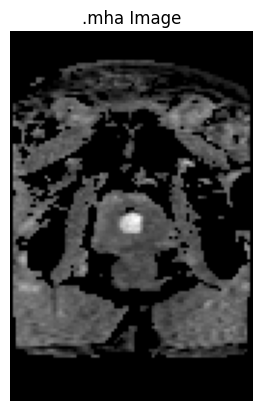

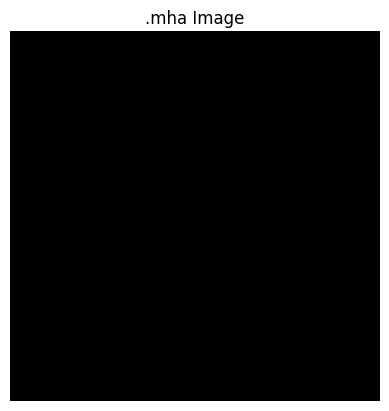

In [6]:
import random

# pick a random folder and set the name of a file inside as the prefix
random_dir = random.choice(dirs)
files_in_dir = get_files(os.path.join(images_root, random_dir))
# pick a file ending with .mha and remove the extension for prefix
mha_files = [f for f in files_in_dir if f.endswith('.mha')]
if mha_files:
    prefix = f"{random_dir}/{mha_files[0][:13]}"
else:
    prefix = f"{random_dir}/{random_dir}_1000000"
#prefix = "10000/10000_1000000"

ruta = os.path.join(images_root, prefix + "_adc.mha")
show_mha_image(ruta)

ruta = os.path.join(labels_resampled_root, prefix.split("/")[1] + ".nii.gz")
show_mha_image(ruta)

In [7]:
import SimpleITK as sitk

def count_and_find_non_empty_masks(folder):
    mask_files = get_files(folder)
    non_empty_count = 0
    non_empty_list = []
    for f in mask_files:
        path = os.path.join(folder, f)
        try:
            mask = sitk.ReadImage(path)
            arr = sitk.GetArrayViewFromImage(mask)
            if arr.max() > 0:
                non_empty_count += 1
                non_empty_list.append(f)
        except Exception as e:
            print(f"Error reading {f}: {e}")
    return non_empty_count, len(mask_files), non_empty_list

non_empty, total, non_empty_masks = count_and_find_non_empty_masks(labels_orig_root)
print(f"{non_empty} out of {total} masks are non-empty (contain a segmentation).")
print("Non-empty mask files:", non_empty_masks)

220 out of 1295 masks are non-empty (contain a segmentation).
Non-empty mask files: ['10040_1000040.nii.gz', '11041_1001061.nii.gz', '10216_1000220.nii.gz', '10304_1000310.nii.gz', '10836_1000852.nii.gz', '11130_1001153.nii.gz', '10164_1000167.nii.gz', '10355_1000361.nii.gz', '11194_1001217.nii.gz', '10938_1000957.nii.gz', '10234_1000238.nii.gz', '10964_1000983.nii.gz', '11423_1001447.nii.gz', '10134_1000136.nii.gz', '11174_1001197.nii.gz', '10032_1000032.nii.gz', '11382_1001405.nii.gz', '10975_1000994.nii.gz', '11050_1001070.nii.gz', '10777_1000793.nii.gz', '10888_1000904.nii.gz', '10157_1000160.nii.gz', '10807_1000823.nii.gz', '10699_1000715.nii.gz', '11100_1001123.nii.gz', '10262_1000266.nii.gz', '10953_1000972.nii.gz', '10726_1000742.nii.gz', '10743_1000759.nii.gz', '10549_1000561.nii.gz', '10558_1000570.nii.gz', '11280_1001303.nii.gz', '10730_1000746.nii.gz', '10957_1000976.nii.gz', '11325_1001348.nii.gz', '11257_1001280.nii.gz', '10688_1000704.nii.gz', '10522_1000532.nii.gz', '11

Mask: 11208_1001231.nii.gz


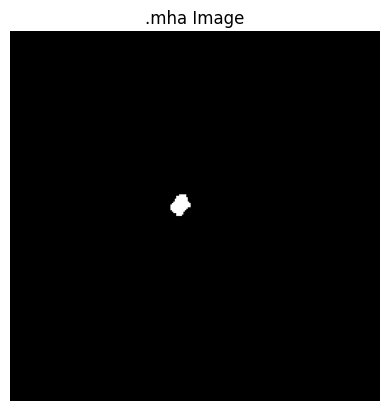

No corresponding image found for mask 11208_1001231.nii.gz
Mask: 10687_1000703.nii.gz


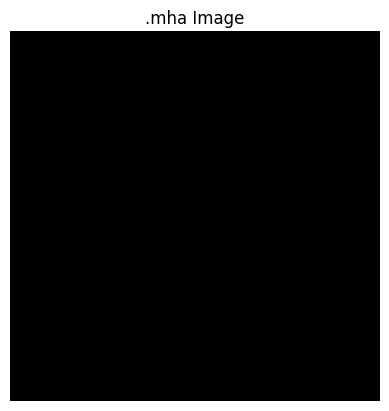

No corresponding image found for mask 10687_1000703.nii.gz
Mask: 10526_1000536.nii.gz


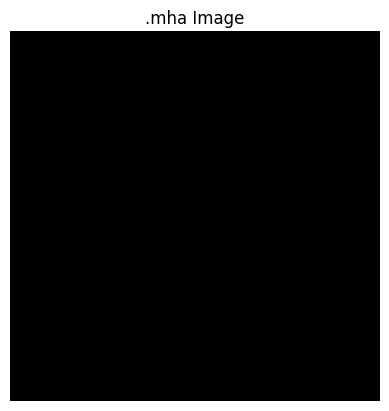

Image: 10526/10526_1000536_adc.mha


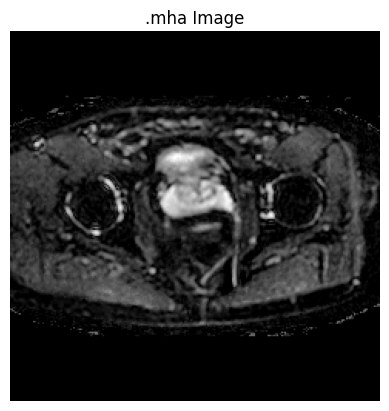

Mask: 11385_1001409.nii.gz


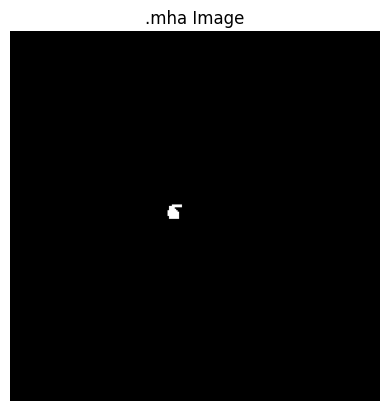

No corresponding image found for mask 11385_1001409.nii.gz
Mask: 11375_1001398.nii.gz


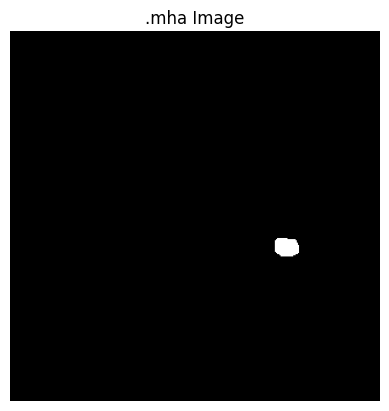

No corresponding image found for mask 11375_1001398.nii.gz
Mask: 10424_1000432.nii.gz


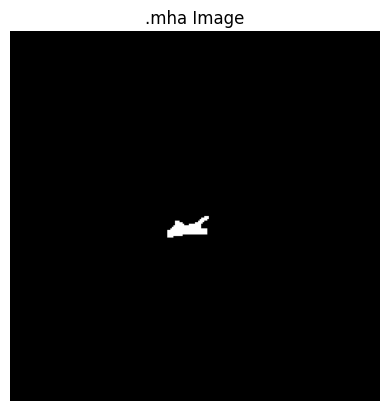

No corresponding image found for mask 10424_1000432.nii.gz
Mask: 10925_1000942.nii.gz


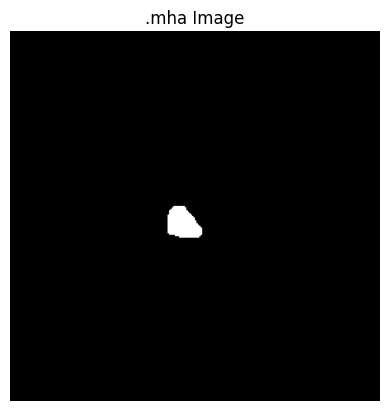

No corresponding image found for mask 10925_1000942.nii.gz
Mask: 11373_1001396.nii.gz


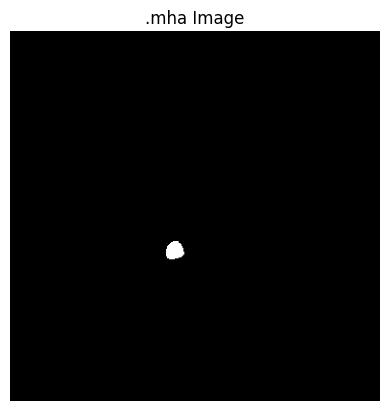

No corresponding image found for mask 11373_1001396.nii.gz
Mask: 10340_1000346.nii.gz


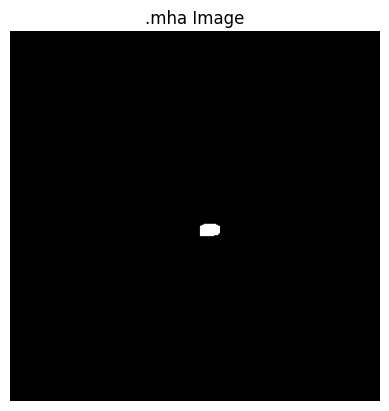

No corresponding image found for mask 10340_1000346.nii.gz
Mask: 10568_1000580.nii.gz


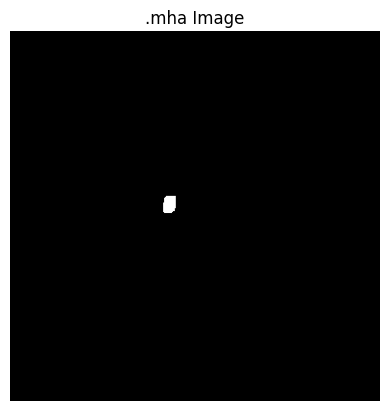

Image: 10568/10568_1000580_adc.mha


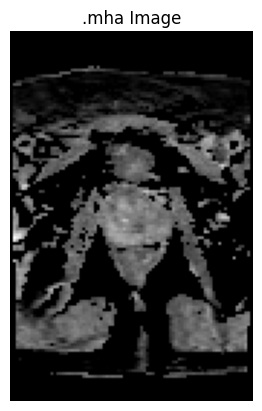

In [8]:
# pick 10 non-empty mask files and show them and their respective images
sample_non_empty = random.sample(non_empty_masks, min(10, len(non_empty_masks)))
for mask_file in sample_non_empty:
    # Show mask
    mask_path = os.path.join(labels_orig_root, mask_file)
    print(f"Mask: {mask_file}")
    show_mha_image(mask_path)
    
    # Show corresponding image (assume prefix is first 13 chars of mask_file)
    prefix = mask_file[:13]
    # Try to find the corresponding image in images_root
    found = False
    for dir in dirs:
        image_path = os.path.join(images_root, dir, prefix + "_adc.mha")
        if os.path.exists(image_path):
            print(f"Image: {dir}/{prefix}_adc.mha")
            show_mha_image(image_path)
            found = True
            break
    if not found:
        print(f"No corresponding image found for mask {mask_file}")

In [9]:
import numpy as np

# Choose a mask file (replace with your actual file if needed)
mask_file = os.path.join(labels_resampled_root, os.listdir(labels_resampled_root)[0])

# Load the mask
mask = sitk.ReadImage(mask_file)
mask_array = sitk.GetArrayViewFromImage(mask)

print(f"File: {mask_file}")
print(f"Shape (z, y, x): {mask_array.shape}")
print(f"Number of dimensions: {mask_array.ndim}")
print(f"Unique values in mask: {np.unique(mask_array)}")

File: /home/guest/work/Datasets/picai_labels-main/csPCa_lesion_delineations/human_expert/resampled/11029_1001049.nii.gz
Shape (z, y, x): (23, 640, 640)
Number of dimensions: 3


Unique values in mask: [0]
